# Setup and Helper Functions

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import json
import ipywidgets as widgets

from matplotlib import pyplot as plt

sns.set_style(style="darkgrid")

pd.set_option('display.max_columns', 100)

In [3]:
def multiplot_from_generator(g, num_columns):
    next(g)
    
    figsize = (15, 15/num_columns)
    
    try:
        while True:
            plt.figure(figsize=figsize)
            for col in range(num_columns):
                ax = plt.subplot(1, num_columns, col+1)
                next(g)
    except StopIteration:
        pass

In [4]:
import geopy.distance

def construct_features(data):
    
    # replacing longitude and latitude with distance in km
    moscow_center = [55.751244, 37.618423]
    coordinates = data[['latitude', 'longitude']].to_numpy()
    dist = [geopy.distance.distance(moscow_center, coordinate).km for coordinate in coordinates]
    data['distance'] = dist
    
    data['top_floor'] = data['floor'] == data['stories']
    data['top_floor'].astype(int)
    data['age'] = 2021 - data['constructed']
    
    return data

In [5]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_scatter(x, y, z):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z)
    return ax

# Load Data

In [6]:
apartments_train = pd.read_csv('data/apartments_train.csv')
buildings_train = pd.read_csv('data/buildings_train.csv')
apartments_test = pd.read_csv('data/apartments_test.csv')
buildings_test = pd.read_csv('data/buildings_test.csv')

# load meta info
with open('data/apartments_meta.json') as f:
    apartments_meta = json.load(f)
    
with open('data/buildings_meta.json') as f:
    buildings_meta = json.load(f)

meta_info = apartments_meta + buildings_meta

Merge building and apartment data

In [7]:
train = pd.merge(
    apartments_train, 
    buildings_train.set_index('id'), 
    how='left', 
    left_on='building_id', 
    right_index=True
)
test = pd.merge(
    apartments_test, 
    buildings_test.set_index('id'), 
    how='left', 
    left_on='building_id', 
    right_index=True
)

In [8]:
train.head()

,id,seller,price,area_total,area_kitchen,area_living,floor,rooms,layout,ceiling,bathrooms_shared,bathrooms_private,windows_court,windows_street,balconies,loggias,condition,phones,building_id,new,latitude,longitude,district,street,address,constructed,material,stories,elevator_without,elevator_passenger,elevator_service,parking,garbage_chute,heating
0,0,3.0,7139520.0,59.2,12.5,31.0,2.0,2.0,NaN,2.65,0.0,2.0,0.0,1.0,NaN,NaN,NaN,1.0,4076,1.0,55.544046,37.478055,11.0,Бунинские Луга ЖК,к2.5/2,2021.0,3.0,9.0,0.0,1.0,1.0,1.0,NaN,NaN
1,1,NaN,10500000.0,88.0,14.2,48.0,18.0,3.0,1.0,NaN,2.0,0.0,1.0,1.0,1.0,0.0,3.0,1.0,1893,0.0,55.861282,37.666647,2.0,улица Радужная,14к3,2010.0,3.0,25.0,0.0,1.0,1.0,1.0,NaN,0.0
2,2,3.0,9019650.0,78.5,22.5,40.8,12.0,3.0,NaN,2.65,0.0,2.0,1.0,1.0,NaN,NaN,NaN,1.0,5176,1.0,55.663299,37.515335,6.0,Саларьево Парк ЖК,38,2021.0,3.0,15.0,0.0,1.0,1.0,1.0,NaN,NaN
3,3,NaN,10500000.0,88.0,14.0,48.0,18.0,3.0,NaN,NaN,0.0,2.0,1.0,1.0,0.0,1.0,2.0,1.0,1893,0.0,55.861282,37.666647,2.0,улица Радужная,14к3,2010.0,3.0,25.0,0.0,1.0,1.0,1.0,NaN,0.0
4,4,NaN,13900000.0,78.0,17.0,35.0,7.0,2.0,1.0,2.90,1.0,0.0,1.0,1.0,0.0,1.0,3.0,1.0,6604,0.0,55.590785,37.451438,11.0,улица Сервантеса,1к3,2017.0,2.0,15.0,0.0,1.0,1.0,1.0,0.0,0.0


In [9]:
test.head()

,id,seller,area_total,area_kitchen,area_living,floor,rooms,layout,ceiling,bathrooms_shared,bathrooms_private,windows_court,windows_street,balconies,loggias,condition,phones,building_id,new,latitude,longitude,district,street,address,constructed,material,stories,elevator_without,elevator_passenger,elevator_service,parking,garbage_chute,heating
0,23285,NaN,71.4,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,5148,0.0,55.762247,37.549040,0.0,2-я Черногрязская улица,6к3,2017.0,2.0,20.0,1.0,1.0,1.0,NaN,1.0,0.0
1,23286,NaN,54.0,4.0,50.0,4.0,1.0,NaN,3.00,NaN,NaN,1.0,0.0,NaN,NaN,3.0,1.0,1290,0.0,55.591467,37.452651,11.0,улица Сервантеса,3к2,2017.0,2.0,15.0,0.0,1.0,1.0,0.0,0.0,0.0
2,23287,3.0,39.4,19.6,11.2,10.0,1.0,NaN,2.65,1.0,0.0,1.0,0.0,NaN,NaN,NaN,1.0,681,1.0,55.617017,37.413718,11.0,Саларьево Парк ЖК,27,2021.0,3.0,9.0,0.0,1.0,1.0,1.0,NaN,NaN
3,23288,NaN,60.9,NaN,NaN,5.0,2.0,1.0,NaN,1.0,0.0,0.0,1.0,NaN,NaN,0.0,1.0,4261,0.0,55.569052,37.479510,11.0,улица Александры Монаховой,23,2014.0,2.0,17.0,1.0,1.0,0.0,NaN,1.0,3.0
4,23289,NaN,34.0,9.0,17.0,14.0,1.0,NaN,2.75,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,7530,0.0,55.518041,37.343829,11.0,улица 3-я Нововатутинская,13к1,2016.0,2.0,17.0,0.0,1.0,1.0,NaN,1.0,0.0


# Exploratory Data Analysis

## Meta Information

In [10]:
import json

def print_meta_info():
    
    df_data = []
    for entry in meta_info:
        nan_count_train, nan_count_test = np.NaN, np.NaN
        data_type = entry["name"]
        if data_type in train:
            nan_count_train = len(train[train[data_type].isna()])
        if data_type in test:
            nan_count_test = len(test[test[data_type].isna()])
        row = [entry["name"], entry["type"], entry["desc"], nan_count_train, nan_count_test]
        df_data.append(row)
    
    df = pd.DataFrame(df_data, columns=["name", "type", "desc", "nan_count_train", "nan_count_test"])
    return df

meta_df = print_meta_info()
meta_df

,name,type,desc,nan_count_train,nan_count_test
0,id,integer_id,Unique ID for apartment,0,0.0
1,seller,categorical,The type of apartment seller,8830,3942.0
2,price,real,The listed price of the apartment (TARGET),0,NaN
3,area_total,real,Total area of the apartment,0,0.0
4,area_kitchen,real,Total kitchen area in the apartment,4721,2233.0
5,area_living,real,Total living space area in the apartment,3882,2019.0
6,floor,integer,Primary building floor of the apartment,0,0.0
7,rooms,integer,Number of rooms in the apartment,0,0.0
8,layout,categorical,Overal apartment layout,17642,7368.0
9,ceiling,real,Ceiling height in the apartment,11093,5018.0


<AxesSubplot:title={'center':'Fraction of NaN values in the test set'}>

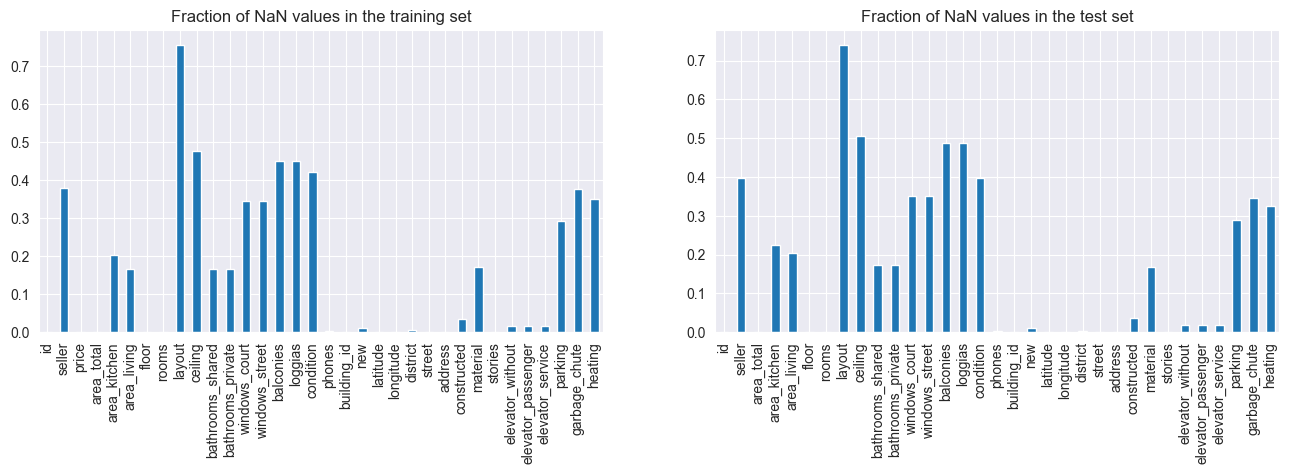

In [11]:
fig, (ax1, ax2) = plt.subplots(figsize=(16, 4), ncols=2, dpi=100)
train.isna().mean().plot.bar(ax=ax1, title='Fraction of NaN values in the training set')
test.isna().mean().plot.bar(ax=ax2, title='Fraction of NaN values in the test set')

**EDA insight:** Several features in both the training and test contain multiple NaN values. The distribution of NaN values appears to be similar in both datasets. However, the test data also has two rows with missing longitude and latitude values.

## Statistics

In [12]:
print("Number of training samples: {}".format(train.shape[0]))
print("Number of test samples: {}".format(test.shape[0]))
print("Number of features: {}".format(train.shape[1]))

Number of training samples: 23285
Number of test samples: 9937
Number of features: 34


In [13]:
print("Train data statistics")
train.describe()

Train data statistics


,id,seller,price,area_total,area_kitchen,area_living,floor,rooms,layout,ceiling,bathrooms_shared,bathrooms_private,windows_court,windows_street,balconies,loggias,condition,phones,building_id,new,latitude,longitude,district,constructed,material,stories,elevator_without,elevator_passenger,elevator_service,parking,garbage_chute,heating
count,23285.000000,14455.000000,2.328500e+04,23285.000000,18564.000000,19403.000000,23285.000000,23285.000000,5643.000000,12192.000000,19413.000000,19413.000000,15213.000000,15213.000000,12765.000000,12765.000000,13475.000000,23205.000000,23285.000000,23021.000000,23285.000000,23285.000000,23155.000000,22491.000000,19313.000000,23285.000000,22928.000000,22928.000000,22928.000000,16497.000000,14474.000000,15124.000000
mean,11642.000000,1.875683,2.355617e+07,74.450999,12.552279,38.741367,8.969594,2.189349,1.039695,3.268374,0.737547,0.662855,0.797147,0.468678,0.556365,0.673090,1.270501,1.162293,4844.089156,0.337692,55.728337,37.583425,4.654848,2002.729581,2.203956,17.608933,0.392620,0.929867,0.743109,0.572589,0.806411,0.176012
std,6721.944845,1.089518,5.264393e+07,58.671373,6.565686,31.398480,8.322039,1.076130,0.351507,10.802728,0.781173,0.716888,0.402137,0.499034,0.641257,0.664779,1.017037,0.456937,2790.676698,0.472933,0.101831,0.150181,3.155835,22.948365,1.021101,11.216638,0.488344,0.255376,0.436928,0.549630,0.395124,0.566275
min,0.000000,0.000000,9.000000e+05,9.300000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.211430,36.864371,0.000000,1855.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5821.000000,1.000000,7.490000e+06,42.000000,8.200000,20.000000,3.000000,1.000000,1.000000,2.650000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2426.000000,0.000000,55.664837,37.497827,2.000000,1989.000000,2.000000,9.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,11642.000000,2.000000,1.064500e+07,59.800000,10.700000,30.900000,7.000000,2.000000,1.000000,2.800000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,4772.000000,0.000000,55.738622,37.571938,5.000000,2013.000000,2.000000,16.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,17463.000000,3.000000,2.050000e+07,84.800000,15.300000,45.300000,12.000000,3.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,7340.000000,1.000000,55.797458,37.671085,7.000000,2020.000000,3.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,23284.000000,3.000000,2.600000e+09,2181.000000,100.000000,900.000000,95.000000,6.000000,2.000000,340.000000,4.000000,4.000000,1.000000,1.000000,4.000000,4.000000,3.000000,2.000000,9735.000000,1.000000,56.006507,37.950668,11.000000,2023.000000,6.000000,95.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000


**EDA insight:** There is a significant difference between the 75% percentile and the maximum value for the price, area_total, area_kitchen, area_living, floor, rooms, ceiling, loggias, balconies, and stories features, suggesting the presence of outliers. These need to be handled.

In [14]:
print("Test data statistics")
test.describe()

Test data statistics


,id,seller,area_total,area_kitchen,area_living,floor,rooms,layout,ceiling,bathrooms_shared,bathrooms_private,windows_court,windows_street,balconies,loggias,condition,phones,building_id,new,latitude,longitude,district,constructed,material,stories,elevator_without,elevator_passenger,elevator_service,parking,garbage_chute,heating
count,9937.000000,5995.000000,9937.000000,7704.000000,7918.000000,9937.000000,9937.000000,2569.000000,4919.000000,8220.000000,8220.000000,6449.000000,6449.000000,5102.000000,5102.000000,5978.000000,9897.000000,9937.000000,9828.000000,9935.000000,9935.000000,9912.000000,9563.000000,8266.000000,9937.000000,9757.000000,9757.000000,9757.000000,7070.000000,6511.000000,6707.000000
mean,28253.000000,1.805838,75.144219,12.874883,39.500515,9.184160,2.202878,1.036201,3.725885,0.776642,0.611922,0.809273,0.438518,0.584673,0.632301,1.259284,1.175003,4694.767032,0.302503,55.710977,37.562880,4.656275,2002.239569,2.236632,18.107578,0.428513,0.924567,0.746438,0.556577,0.764552,0.140152
std,2868.709146,1.087742,56.359318,6.878015,33.145228,7.963073,1.107315,0.334674,15.915162,0.811608,0.709386,0.392905,0.496244,0.645422,0.669174,1.041879,0.462727,2772.449218,0.459365,0.810385,2.441444,3.156144,23.635988,1.063680,10.725279,0.494889,0.264102,0.435072,0.578640,0.424311,0.515819
min,23285.000000,0.000000,13.000000,1.200000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,17.141734,-61.790500,0.000000,1860.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25769.000000,1.000000,42.400000,8.200000,20.000000,3.000000,1.000000,1.000000,2.650000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2145.000000,0.000000,55.669772,37.492455,2.000000,1988.000000,2.000000,10.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,28253.000000,2.000000,59.600000,10.800000,31.000000,7.000000,2.000000,1.000000,2.800000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,4728.000000,0.000000,55.738449,37.568920,5.000000,2014.000000,2.000000,17.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,30737.000000,3.000000,86.000000,16.000000,45.400000,13.000000,3.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,6983.000000,1.000000,55.798905,37.662843,7.000000,2019.000000,3.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,33221.000000,3.000000,1175.000000,63.600000,528.000000,69.000000,6.000000,2.000000,350.000000,4.000000,4.000000,1.000000,1.000000,4.000000,4.000000,3.000000,2.000000,9734.000000,1.000000,56.001625,132.768097,11.000000,2022.000000,6.000000,87.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000


In [15]:
train = construct_features(train)

**EDA insight:** There are some latitude and longitude values in the test data indicating a location far away from moscow.

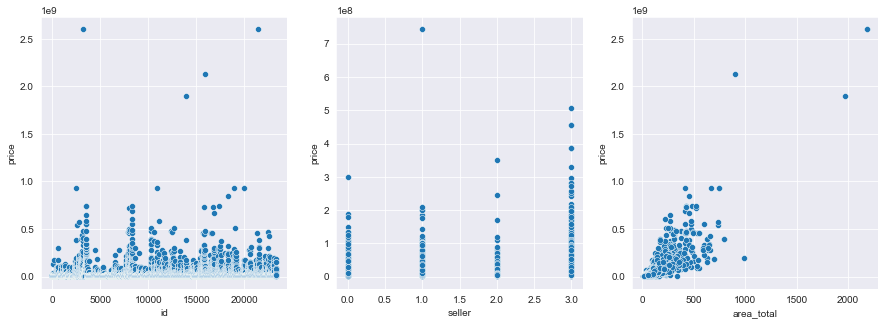

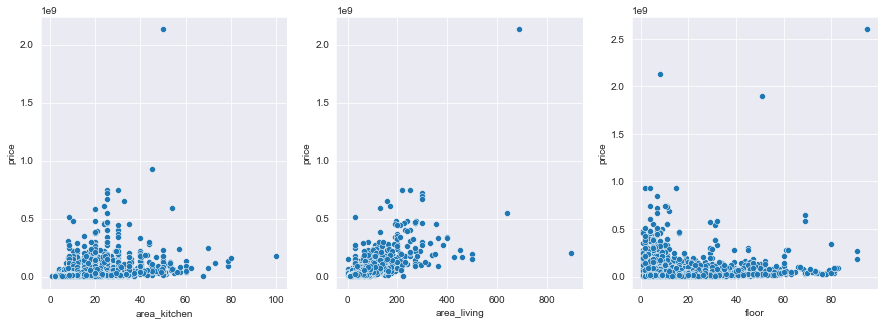

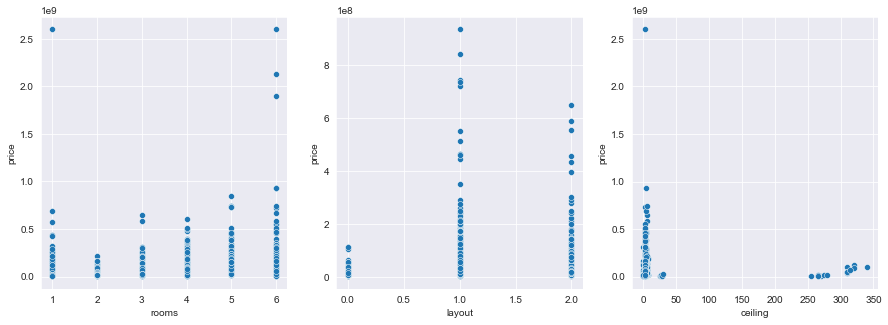

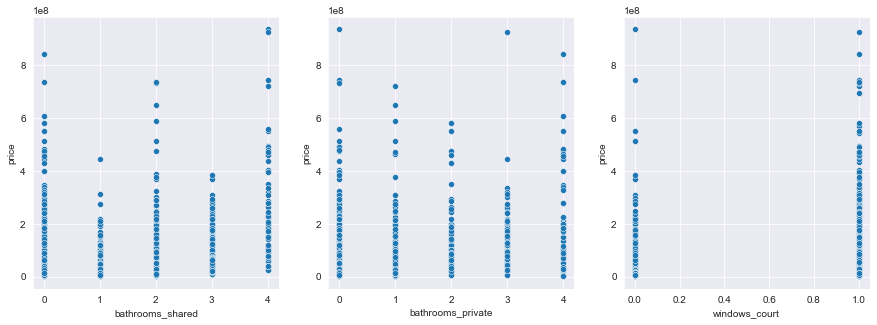

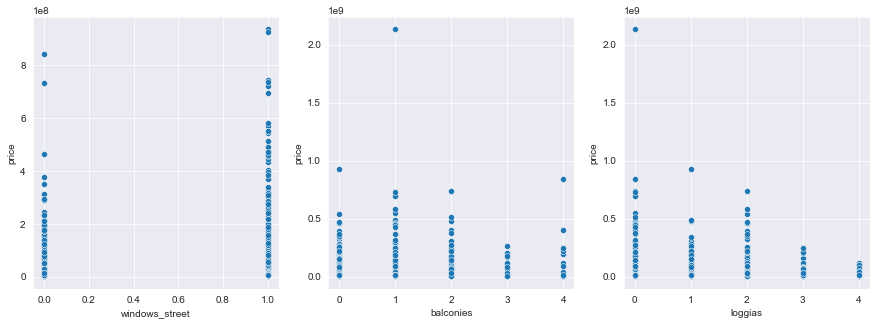

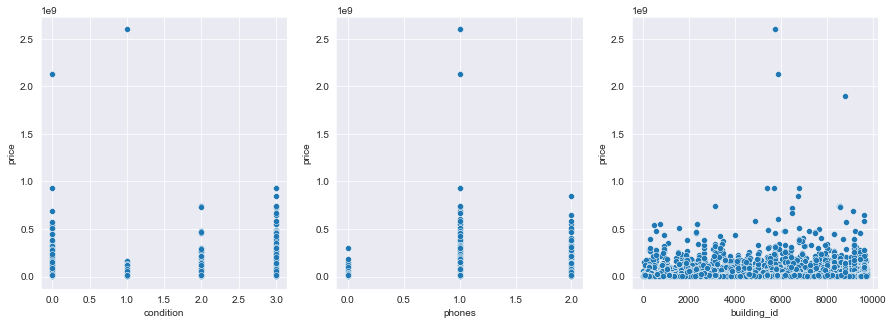

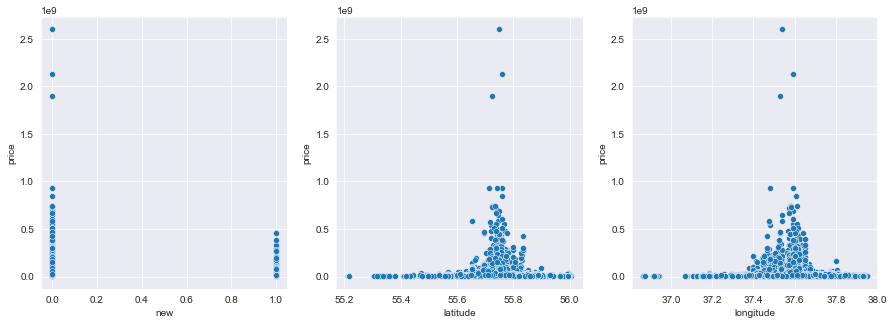

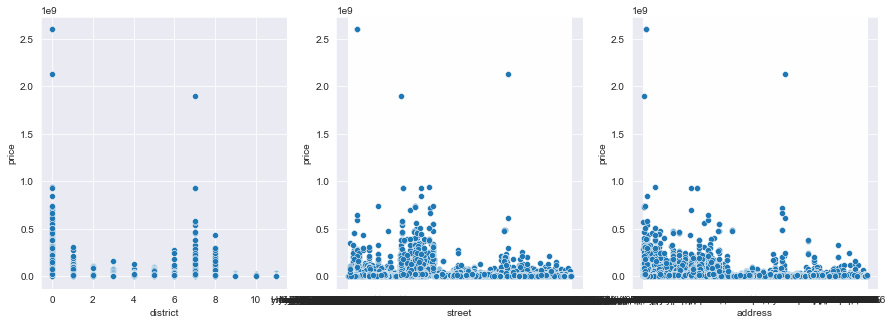

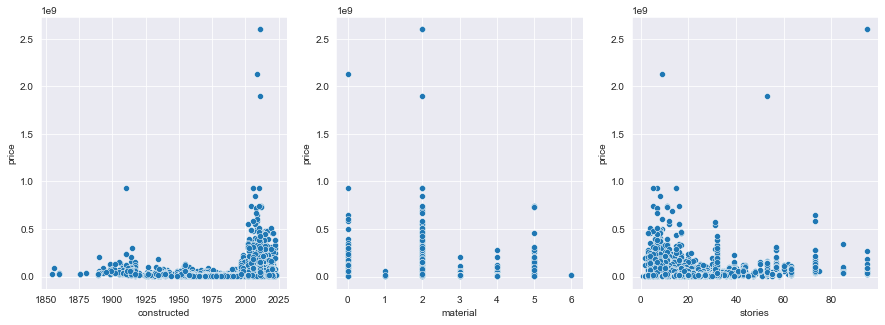

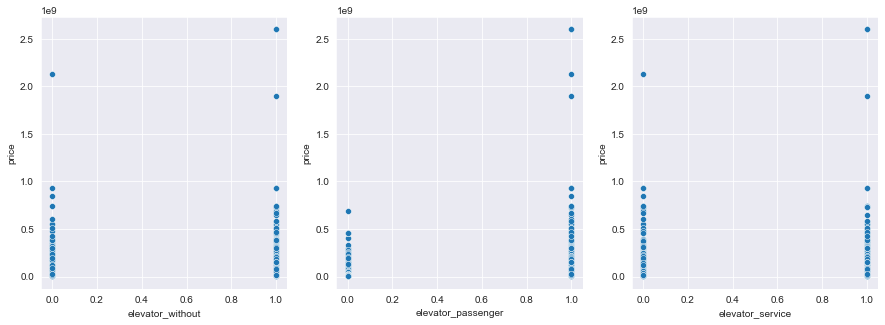

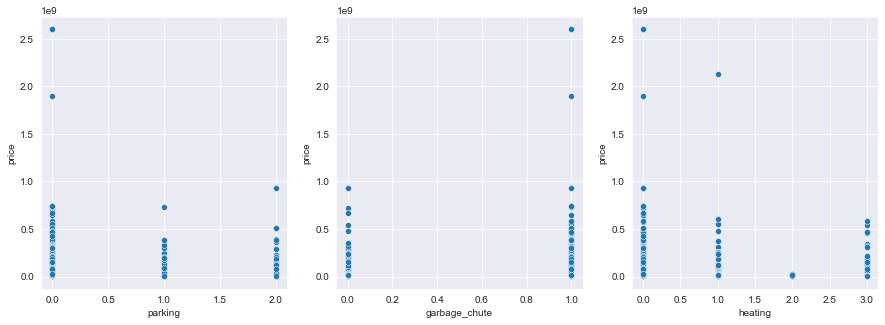

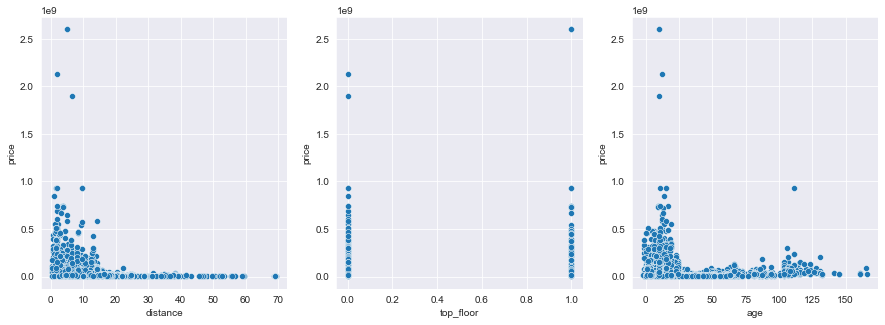

In [16]:
features = train.columns[train.columns != "price"]

def plot_price_feature_relation():
    for feature in features:
        yield
        sns.scatterplot(x=feature, y="price", data=train)

multiplot_from_generator(plot_price_feature_relation(), 3)

**EDA insight**:
1. area_total has a high correlation with the price. It would be interesting to see if the correlation increases if only houses that are close to the city center (i.e. not further than 10kms) are considered. The same applies to area_living.
2. It would be interesting to see if there are some streets where the house prices tend to be higher than in other streets (similar to monopoly).
3. For houses built after 1990, the house prices tend to increase with a lower age, whereas it is the opposite for houses built before 1990. If the house was built before 1990, the older it is, the more expensive it gets.
4. The distance certainly appears to play a role. If the houses are further away than 15kms from the city center, the prices tend to be very low. However, the variance is quite high for the houses even if they are close to the image center. The reason for this needs to be investigated. It may be due to the age of the building.
5. It would be interesting to see how the age and distance behave with respect to the price. For instance, do houses with a low distance but high age tend to be cheaper?
6. Could there be a relation between the age and the number of stories as well as the price? For example, do new buildings tend to have more floors than old buildings and if so, does this have a positive correlation with the price?
7. There is a high variability between the prices in some districts? What may be the cause of this? Can it be related to the age?
8. Do buildings that are close to each other have similar prices? E.g., if there the neighbouring building tends to be expensive, is the other building also expensive?

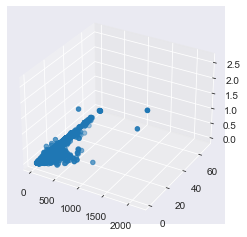

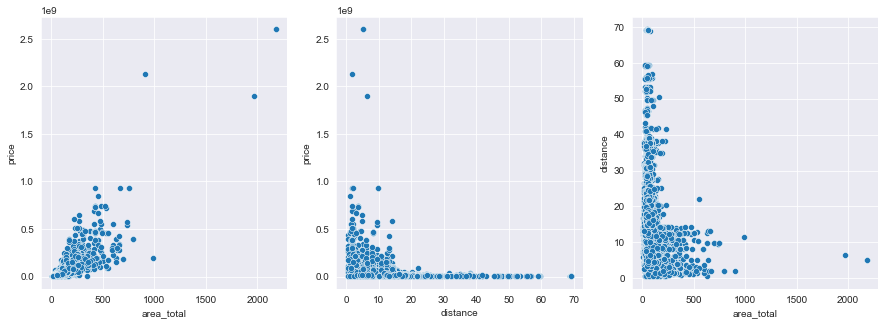

In [17]:
plot_3d_scatter(train["area_total"], train["distance"], train["price"])
plt.show()
def area_total_distance_price():
    d = train
    yield
    sns.scatterplot(x="area_total", y="price", data=d)
    yield
    sns.scatterplot(x="distance", y="price", data=d)
    yield
    sns.scatterplot(x="area_total", y="distance", data=d)

multiplot_from_generator(area_total_distance_price(), num_columns=3)

**EDA insight**: Houses further away from the center have a rather low total area than those close to the center.
**EDA insight**: Considering the price per square meter could give further insight.

In [18]:
train["price_per_m2"] = train["price"] / train["area_total"]

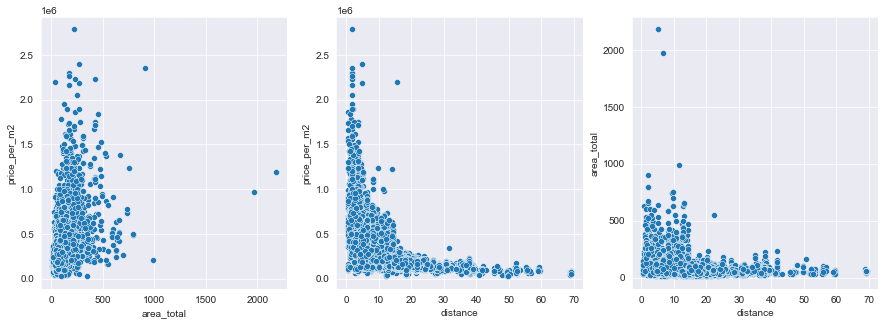

In [21]:
def area_total_distance_price_per_m2():
    d = train
    yield
    sns.scatterplot(x="area_total", y="price_per_m2", data=d)
    yield
    sns.scatterplot(x="distance", y="price_per_m2", data=d)
    yield
    sns.scatterplot(x="distance", y="area_total", data=d)

multiplot_from_generator(area_total_distance_price_per_m2(), num_columns=3)

**EDA insight:** The m2 price increases significantly with a shorter distance and indicates a clearer relationship than the price alone. However, there is still a strong variability which needs to be further investigated. What distinguishes cheap houses that are close to the center from expensive ones? Age? Number of stories? The street they are placed in? The price of other houses in the vicinity?

Possible features of interest:
* Distance to schools, shopping and entertainment opportunities, as well as recreational centers
* Proximity to public transport and highways
* neighbourhood comps, i.e., clusterings of the homes

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

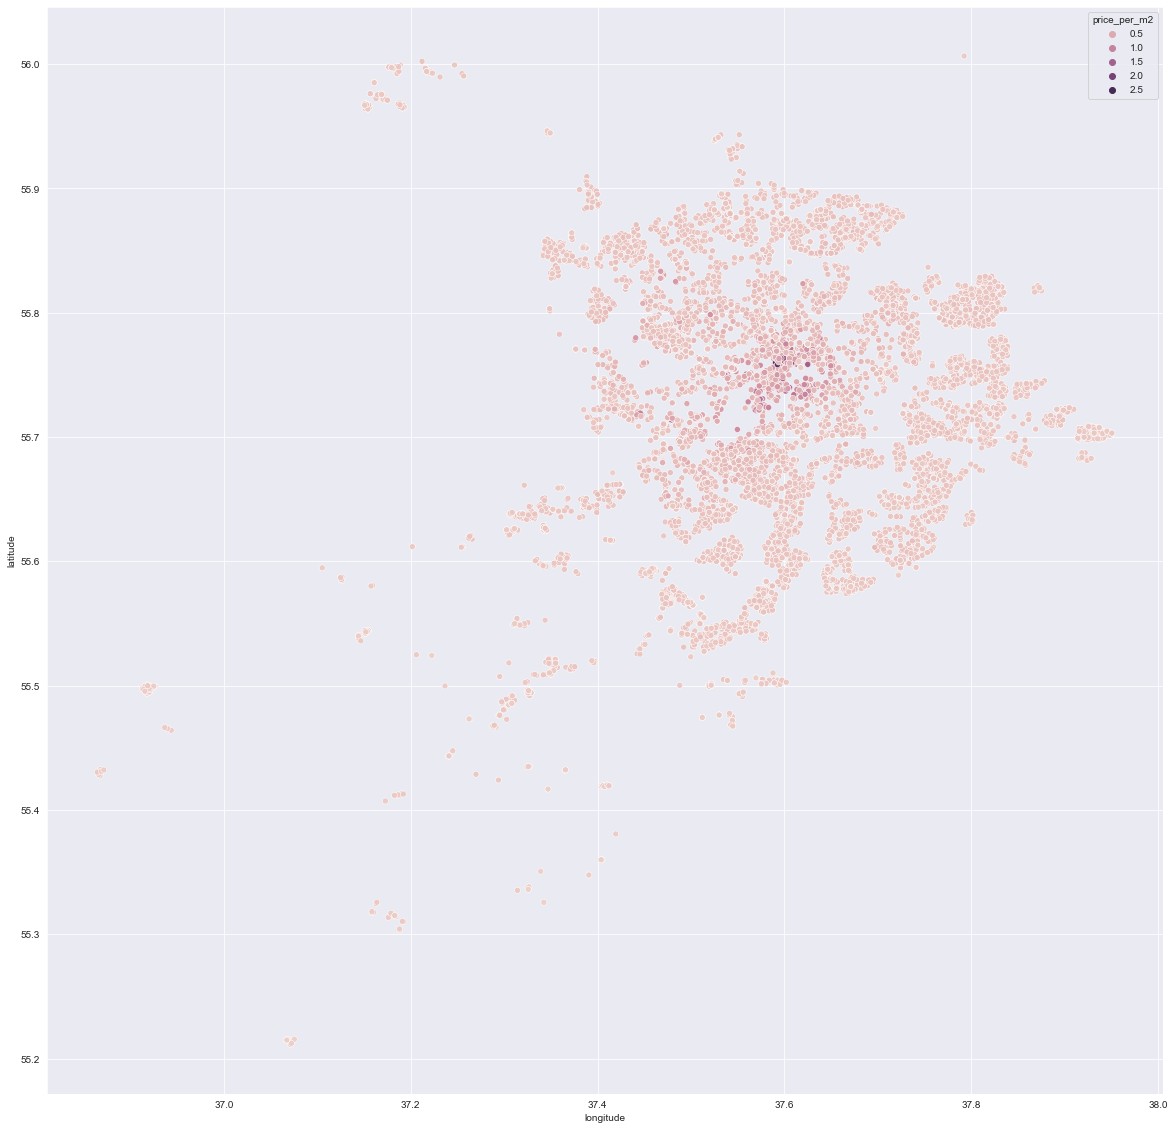

In [59]:
d = train
plt.figure(figsize=(20,20))
sns.scatterplot(x="longitude", y="latitude", data=d, hue="price_per_m2")

In [ ]:
print("Skewness in training data:")
skew_feats = train.skew().sort_values(ascending=False)
pd.DataFrame({'Skew': skew_feats}).T

**EDA insight:** Ceiling, price, area_total, area_living, heating, floor, stories, area_kitchen, elevator_service, constructed, windows_court, garbage_chute, and elevator_passenger in the training data appear to be significantly skewed. Log-transformation required.

In [ ]:
print("Skewness in test data:")
skew_feats = test.skew().sort_values(ascending=False)
pd.DataFrame({'Skew': skew_feats}).T

**EDA insight:** The same features as in the training data appear to be skewed. However, longitude and latitude also have a substantial skewness, strenghthening the assumption that some coordinates in the dataset are nowhere close to moscow.

## Feature Relations

### Correlation

<AxesSubplot:>

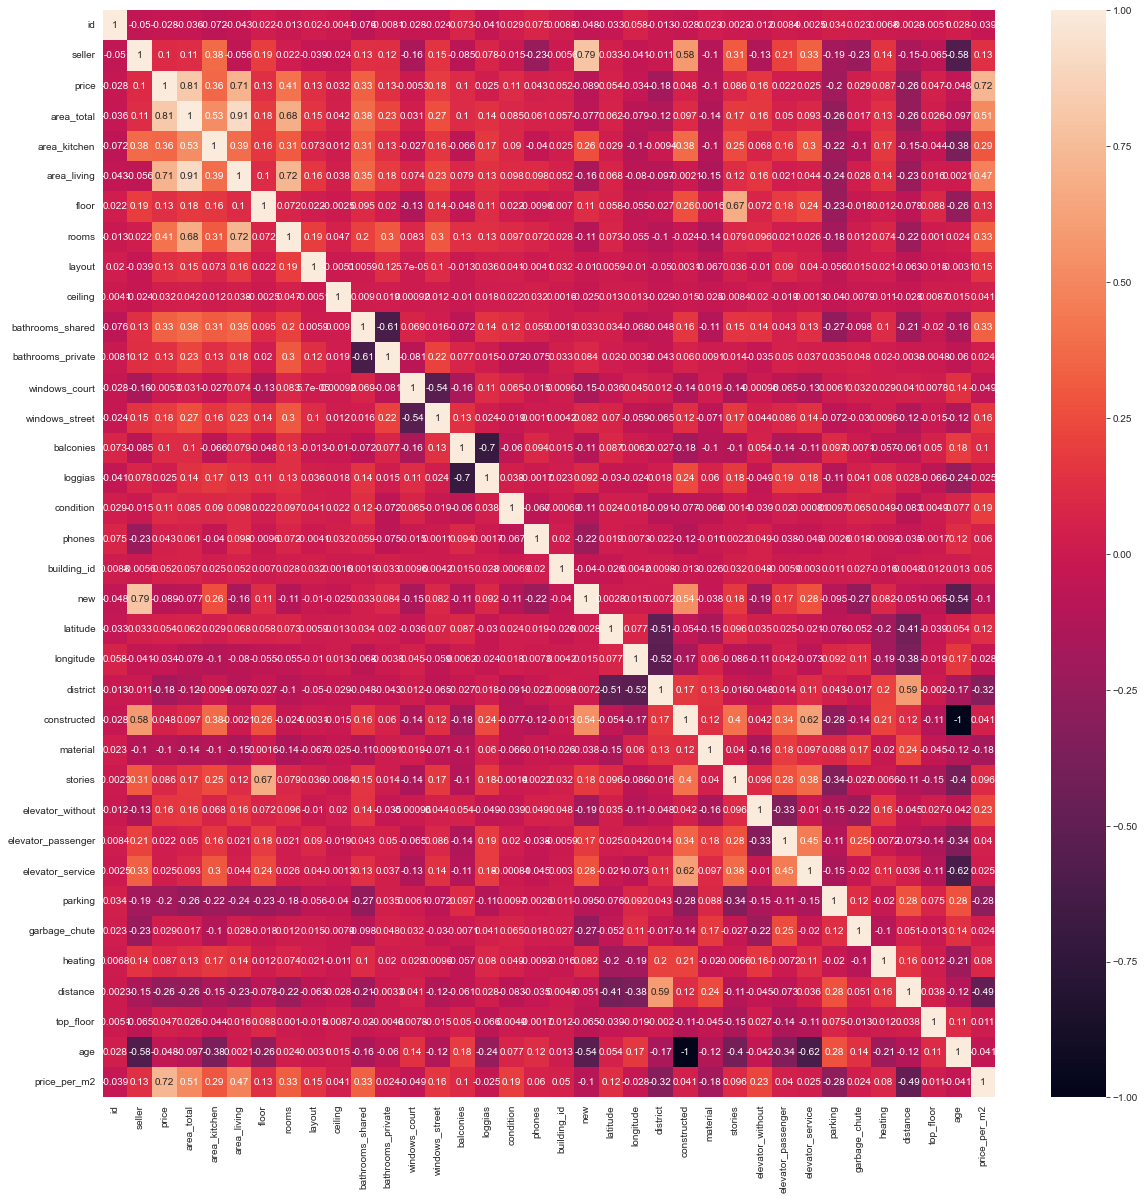

In [47]:
plt.figure(figsize=(20,20))
sns.heatmap(train.corr(), annot=True)

**EDA insight:** Correlation between the price and area_total, area_kitchen, area_living, floor, rooms, layout, bathrooms_shared, bathrooms_private, windows_street, balconies, district, material, elevator_without, and parking. However, some correlations may not be as strong as implied due the high number of missing values in some features, such as layout, balconies and condition.

In [48]:
print("Correlation between the price and the other features combined with the number of missing values:")
nan_count = [len(train[train[feature].isna()]) for feature in train.corr()["price"].index]
corr_df = pd.DataFrame(
    {
        "corr": train.corr()["price"], 
        "nan_count": nan_count,
        "nan_percentage": (np.array(nan_count) / train.shape[0])
    }
).sort_values(by="nan_count", ascending=False)
corr_df

Correlation between the price and the other features combined with the number of missing values:


,corr,nan_count,nan_percentage
layout,0.130822,17642,0.757655
ceiling,0.031640,11093,0.476401
loggias,0.024877,10520,0.451793
balconies,0.102928,10520,0.451793
condition,0.109338,9810,0.421301
seller,0.101015,8830,0.379214
garbage_chute,0.029171,8811,0.378398
heating,0.087359,8161,0.350483
windows_court,-0.005345,8072,0.346661
windows_street,0.180263,8072,0.346661


# Data Cleaning

##  Drop features with very high percentage of nans

In [49]:
nan_threshold = 0.4
rel_feats = corr_df[corr_df["nan_percentage"] < nan_threshold]
rel_feats

,corr,nan_count,nan_percentage
seller,0.101015,8830,0.379214
garbage_chute,0.029171,8811,0.378398
heating,0.087359,8161,0.350483
windows_court,-0.005345,8072,0.346661
windows_street,0.180263,8072,0.346661
parking,-0.199476,6788,0.291518
area_kitchen,0.364758,4721,0.202749
material,-0.100614,3972,0.170582
area_living,0.707580,3882,0.166717
bathrooms_shared,0.332421,3872,0.166287


In [50]:
train[rel_feats.index]

,seller,garbage_chute,heating,windows_court,windows_street,parking,area_kitchen,material,area_living,bathrooms_shared,bathrooms_private,constructed,age,elevator_service,elevator_without,elevator_passenger,new,district,phones,distance,top_floor,id,building_id,stories,longitude,latitude,rooms,floor,area_total,price,price_per_m2
0,3.0,NaN,NaN,0.0,1.0,1.0,12.5,3.0,31.0,0.0,2.0,2021.0,0.0,1.0,0.0,1.0,1.0,11.0,1.0,24.703331,False,0,4076,9.0,37.478055,55.544046,2.0,2.0,59.2,7139520.0,120600.000000
1,NaN,NaN,0.0,1.0,1.0,1.0,14.2,3.0,48.0,2.0,0.0,2010.0,11.0,1.0,0.0,1.0,0.0,2.0,1.0,12.619097,False,1,1893,25.0,37.666647,55.861282,3.0,18.0,88.0,10500000.0,119318.181818
2,3.0,NaN,NaN,1.0,1.0,1.0,22.5,3.0,40.8,0.0,2.0,2021.0,0.0,1.0,0.0,1.0,1.0,6.0,1.0,11.741795,False,2,5176,15.0,37.515335,55.663299,3.0,12.0,78.5,9019650.0,114900.000000
3,NaN,NaN,0.0,1.0,1.0,1.0,14.0,3.0,48.0,0.0,2.0,2010.0,11.0,1.0,0.0,1.0,0.0,2.0,1.0,12.619097,False,3,1893,25.0,37.666647,55.861282,3.0,18.0,88.0,10500000.0,119318.181818
4,NaN,0.0,0.0,1.0,1.0,1.0,17.0,2.0,35.0,1.0,0.0,2017.0,4.0,1.0,0.0,1.0,0.0,11.0,1.0,20.725554,False,4,6604,15.0,37.451438,55.590785,2.0,7.0,78.0,13900000.0,178205.128205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23280,NaN,1.0,1.0,1.0,0.0,0.0,16.0,2.0,32.0,0.0,1.0,2017.0,4.0,1.0,0.0,1.0,1.0,7.0,1.0,15.334308,False,23280,3139,24.0,37.376626,55.770775,2.0,3.0,65.0,13300000.0,204615.384615
23281,3.0,NaN,NaN,NaN,NaN,0.0,9.6,2.0,36.5,NaN,NaN,2020.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,4.356357,False,23281,7624,20.0,37.585790,55.785777,2.0,6.0,56.9,15854300.0,278634.446397
23282,NaN,0.0,NaN,NaN,NaN,0.0,23.0,2.0,29.3,NaN,NaN,2018.0,3.0,1.0,1.0,1.0,0.0,7.0,0.0,6.616222,True,23282,8021,16.0,37.513143,55.753686,2.0,16.0,73.4,19800000.0,269754.768392
23283,0.0,NaN,0.0,NaN,NaN,0.0,20.0,2.0,NaN,NaN,NaN,1997.0,24.0,1.0,0.0,1.0,0.0,5.0,0.0,16.340933,False,23283,4591,10.0,37.696741,55.611302,3.0,4.0,100.8,29999000.0,297609.126984


## Impute Missing Values

In [52]:
import miceforest as mf

random_state=42
kernel = mf.MultipleImputedKernel(
  data=train,
  save_all_iterations=True,
  random_state=random_state
)
kernel.mice(iterations=3)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
kernel.plot_correlations()

In [ ]:
train_imputed = kernel.complete_data(dataset=3)
fig, (ax1, ax2) = plt.subplots(figsize=(16, 4), ncols=2, dpi=100)
train_imputed.isna().mean().plot.bar(ax=ax1, title='Fraction of NaN values in the training set')

## Outliers

### area_total

In [ ]:
print("Correlation price-area_total: {}".format(train_imputed[["area_total", "price"]].corr()["area_total"]["price"]))
sns.scatterplot(x="area_total", y="price", data=train_imputed)

The correlation between price and the total area is very high, indicating that this is an important feature. However, as the plot shows, there are some outliers. For instance, with a total area of 1000m2, 2 houses are priced very differently. One of the houses is more expensive than a house with 2000m2, while the other the cheaper house is priced similarly to the houses with approx. 600m2. 

In [ ]:
i_1 = train_imputed[(train_imputed["price"] > 2e9) & (train_imputed["area_total"] < 1100)].index[0]
i_2 = train_imputed[(train_imputed["price"] < 0.5e9) & (train_imputed["area_total"] > 900)].index[0]
train_imputed = train_imputed.drop(train_imputed.index[[i_1, i_2]])

In [ ]:
print("Correlation price-area_total: {}".format(train_imputed[["area_total", "price"]].corr()["area_total"]["price"]))
sns.scatterplot(x="area_total", y="price", data=train_imputed)

### rooms

In [ ]:
print("Correlation price-area_total: {}".format(train_imputed[["rooms", "price"]].corr()["rooms"]["price"]))
sns.scatterplot(x="rooms", y="price", data=train_imputed)

In [ ]:
j = train_imputed[(train_imputed["price"] > 2e9) & (train_imputed["rooms"] < 2)].index[0]
train_imputed.drop([j], inplace=True)

In [ ]:
print("Correlation price-area_total: {}".format(train_imputed[["rooms", "price"]].corr()["rooms"]["price"]))
sns.scatterplot(x="rooms", y="price", data=train_imputed)

In [ ]:
sns.scatterplot(x="floor", y="price", data=train_imputed)

# Feature Engineering

**Distance based on longitude and latitude**

In [ ]:
data_train = construct_features(kernel.complete_data(dataset=3))

## Data Transformation

In [ ]:
# c = data_train.corr()["price"]
# features = c[c.abs() > 0.2].index
# features = features.to_numpy()
# features = np.delete(features, np.where(features == "price"))
# features = ["area_total", "distance_to_center", "distance", "area_living"]
# features

In [ ]:
features = ["area_total", "distance_to_center", "distance", "rooms", "district",]
# features = data_train.columns
# features = np.delete(features, np.where(features == "price"))
# features = np.delete(features, np.where(features == "address"))
# features = np.delete(features, np.where(features == "street"))

In [ ]:
print("Skewness in training data:")
skew_feats = data_train.skew().sort_values(ascending=False)
pd.DataFrame({'Skew': skew_feats}).T

In [ ]:
r = ["price", "distance", "area_total",]
for f in r:
    data_train[f] = np.log1p(data_train[f]) 

In [ ]:
print("Skewness in training data:")
skew_feats = data_train.skew().sort_values(ascending=False)
pd.DataFrame({'Skew': skew_feats}).T

plt.figure(figsize=(20,20))
sns.heatmap(train.corr(), annot=True)**Age based on constructed**

# Training and Model Optimisation

In [ ]:
from sklearn.model_selection import train_test_split

X = data_train[features]
y = data_train['price']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, stratify=np.log(data_train.price).round())

In [ ]:
from sklearn.metrics import mean_squared_log_error

def root_mean_squared_log_error(y_true, y_pred):
    # Alternatively: sklearn.metrics.mean_squared_log_error(y_true, y_pred) ** 0.5
    # assert (y_true >= 0).all() 
    # assert (y_pred >= 0).all()
    # log_error = np.log1p(y_pred) - np.log1p(y_true)  # Note: log1p(x) = log(1 + x)
    # return np.mean(log_error ** 2) ** 0.5
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

mean = y_train.mean()
y_train_hat = np.full(len(y_train), mean)
y_val_hat = np.full(len(y_val), mean)
print(f'Train rmsle: {root_mean_squared_log_error(y_true=(np.e ** y_train) - 1, y_pred=(np.e ** y_train_hat) - 1) :.4f}')
print(f'Valid rmsle: {root_mean_squared_log_error(y_true=(np.e ** y_val) - 1, y_pred=(np.e ** y_val_hat) - 1) :.4f}')
# print(f'Train rmsle: {root_mean_squared_log_error(y_true=y_train, y_pred=y_train_hat) :.4f}')
# print(f'Valid rmsle: {root_mean_squared_log_error(y_true=y_val, y_pred=y_val_hat) :.4f}')

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(
    n_estimators=200, 
    criterion='mse',
    n_jobs=2,
    random_state=42,
    max_features='log2',
)
rf_reg.fit(X_train, y_train)


train_pred = rf_reg.predict(X_train)
val_pred = rf_reg.predict(X_val)
print(f'Train rmsle: {root_mean_squared_log_error(y_true=(np.e ** y_train) - 1, y_pred=(np.e ** train_pred) - 1) :.4f}')
print(f'Valid rmsle: {root_mean_squared_log_error(y_true=(np.e ** y_val) - 1, y_pred=(np.e ** val_pred) - 1) :.4f}')
# print(f'Valid rmsle: {root_mean_squared_log_error(y_true=y_val, y_pred=rf_pred) :.4f}')

plt.scatter(val_pred, y_val)
plt.xlabel('Random Forest prediction')
plt.ylabel('Ground Truth')

In [ ]:
from sklearn.neural_network import MLPRegressor

mlp_reg = MLPRegressor(
    hidden_layer_sizes=200,
    max_iter=400
)
mlp_reg.fit(X_train, y_train)

mlp_pred = mlp_reg.predict(X_val)
print(f'Valid rmsle: {root_mean_squared_log_error(y_true=(np.e ** y_val) - 1, y_pred=(np.e ** mlp_pred) - 1) :.4f}')

plt.scatter(mlp_pred, y_val)
plt.xlabel('Random Forest prediction')
plt.ylabel('Ground Truth')

In [ ]:
import lightgbm as lgbm

lgbm_reg = lgbm.LGBMRegressor(
    random_state=42,
    learning_rate=0.2,
)

lgbm_reg.fit(X_train, y_train)

lgbm_pred = lgbm_reg.predict(X_val)
print(f'Valid rmsle: {root_mean_squared_log_error(y_true=(np.e ** y_val) - 1, y_pred=(np.e ** lgbm_pred) - 1) :.4f}')

plt.scatter(lgbm_pred, y_val)
plt.xlabel('LGBM prediction')
plt.ylabel('Ground Truth')

In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

X_train = np.array(X_train)
X_val = np.array(X_val)
y_train = np.array(y_train)
y_val = np.array(y_val)

model = Sequential()

model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))

model.compile(optimizer=Adam(0.0001), loss='mse')

r = model.fit(X_train, y_train,
              validation_data=(X_val,y_val),
              batch_size=1,
              epochs=10)


# Prediction

In [ ]:
random_state=42
kernel = mf.MultipleImputedKernel(
  data=test,
  save_all_iterations=True,
  random_state=random_state
)
kernel.mice(iterations=3)

In [ ]:
test_imputed = kernel.complete_data(dataset=3)
fig, (ax1, ax2) = plt.subplots(figsize=(16, 4), ncols=2, dpi=100)
test_imputed.isna().mean().plot.bar(ax=ax1, title='Fraction of NaN values in the training set')

In [ ]:
data_test = construct_features(test_imputed)
r = ["distance", "area_total",]
for f in r:
    data_test[f] = np.log1p(data_test[f])

In [ ]:
X_test = data_test[features]
y_pred = model.predict(X_test)

submission = pd.DataFrame()
submission['id'] = data_test.id
submission['price_prediction'] = (np.e ** y_pred) - 1
submission.to_csv('submission.csv', index=False)

print('\nLine count of submission')
!wc -l submission.csv

print('\nFirst 5 rows of submission')
!head -n 5 submission.csv

In [ ]:
buildings_train["district"].value_counts()
district_names = {
    3: "East",
    6: "South-West",
    5: "South",
    4: "South-East",
    0: "Central",
    2: "North-East",
    1: "North",
    8: "North-West",
    7: "West",
    11: "Novomoskovsk",
    10: "Troitsk",
    9: "Zelenograd"
}
district_population = {
    3: 1394497,
    6: 1179211,
    5: 1593065,
    4: 1116924,
    0: 701353,
    2: 1240062,
    1: 1112846,
    8: 779965,
    7: 1049104,
    11: 113569,
    10: 86752,
    9: 215727
}

district_area = {
    0: 66.1755,
    1: 109.9,
    2: 101.883,
    3: 154.6,
    4: 117.6,
    5: 132.0,
    6: 111.4,
    7: 153.0,
    8: 93.281,
    9: 37.22,
    10: 361.4,
    11: 1084.3
    
}

pop_density = {k: district_population[k] / v for k, v in district_area.items()}